In [1]:
#Imports
import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

In [2]:
# Import data
train = 'https://raw.githubusercontent.com/ss16318/AML_Group_3/main/train.csv'
df_train_raw = pd.read_csv(train)

test_x = 'https://raw.githubusercontent.com/ss16318/AML_Group_3/main/test.csv'
df_test_x_raw = pd.read_csv(test_x)

test_y = 'https://raw.githubusercontent.com/ss16318/AML_Group_3/main/sample_submission.csv'
df_test_y_raw= pd.read_csv(test_y)

In [3]:
# Merge train dataset and test dataset
df_test_raw = pd.merge(df_test_x_raw, df_test_y_raw, on='Id')
df_raw = pd.concat([df_train_raw,df_test_raw])

In [4]:
# From the data description, when these values are nan, the property does not contain installment. 
# So we will change these features from nan to None
na_none = ['Alley','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
     'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

In [5]:
# Check percentage of missing data for each feature in train dataset
na_col = [i for i in df_raw.columns if df_raw[i].isnull().sum() > 0 and i not in na_none]
print((df_raw[na_col].isna().sum()/len(df_raw.Id)).sort_values())

BsmtUnfSF       0.000343
GarageCars      0.000343
KitchenQual     0.000343
Electrical      0.000343
TotalBsmtSF     0.000343
GarageArea      0.000343
BsmtFinSF2      0.000343
SaleType        0.000343
Exterior2nd     0.000343
Exterior1st     0.000343
BsmtFinSF1      0.000343
BsmtFullBath    0.000685
BsmtHalfBath    0.000685
Utilities       0.000685
Functional      0.000685
MSZoning        0.001370
MasVnrArea      0.007879
MasVnrType      0.008222
GarageYrBlt     0.054471
LotFrontage     0.166495
dtype: float64


In [6]:
def clean_df(df):
    
    for col in df.columns:
        
        # Replace the missing value to None if feature is in the na_none list
        if col in na_none:
            df[col] =  df[col].fillna('None')
        
        # Drop features that contain more than 20% missing values
        elif df[col].isnull().sum() / df.shape[0] > 0.1:
            df = df.drop(col, axis=1)
            
    return df

In [7]:
df_cleaned = clean_df(df_raw) # drop columns and replace nan with none

df_cleaned = df_cleaned.dropna() #drop any row with missing data

In [8]:
#Drop ID column
df_cleaned = df_cleaned.drop('Id', axis=1)

# split train dataset
df_x = df_cleaned.drop(columns='SalePrice')
df_y = df_cleaned['SalePrice']

df_x.shape

(2726, 78)

### Numan's work

In [9]:
df_x.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,None,None,None,0,12,2008,WD,Normal


In [10]:
df_x.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'Ope

In [11]:
len(df_x.columns)

78

In [12]:
df_x.nunique(axis=0)

MSSubClass         16
MSZoning            5
LotArea          1852
Street              2
Alley               3
                 ... 
MiscVal            34
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
Length: 78, dtype: int64

In [13]:
df_x.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2726.000000,2726.000000,2726.000000,2726.000000,2726.000000,2726.000000,2726.000000,2726.000000,2726.000000,2726.000000,...,2726.000000,2726.000000,2726.000000,2726.000000,2726.000000,2726.000000,2726.000000,2726.000000,2726.000000,2726.000000
mean,56.157373,10244.780264,6.173514,5.585473,1972.776596,1984.766324,107.478723,455.412693,52.024578,560.290536,...,499.895818,97.620323,47.740279,22.052825,2.721937,17.048423,2.411225,50.458180,6.218269,2007.790536
std,41.302080,7974.441897,1.370050,1.060999,29.403944,20.615645,182.953229,457.754249,173.177946,439.713842,...,188.924920,128.422134,65.726623,63.609890,25.842865,57.823241,36.900093,580.678271,2.701215,1.316570
min,20.000000,1300.000000,2.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,7552.000000,5.000000,5.000000,1955.000000,1966.000000,0.000000,0.000000,0.000000,222.250000,...,364.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,9548.500000,6.000000,5.000000,1975.000000,1993.000000,0.000000,386.500000,0.000000,462.000000,...,484.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,11643.000000,7.000000,6.000000,2001.000000,2004.000000,174.000000,744.750000,0.000000,798.750000,...,583.750000,171.000000,71.500000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,...,1488.000000,1424.000000,570.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


## Univariate Analysis

In [14]:
categorical = [
    'MSSubClass', 'MSZoning', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
    'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
    'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
    'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'PavedDrive', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
    'SaleCondition'
]

numerical = [
    'LotArea', 'Street', 'Alley', 'LotShape', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
    'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
    'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
    'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
    'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
]

### Categorical

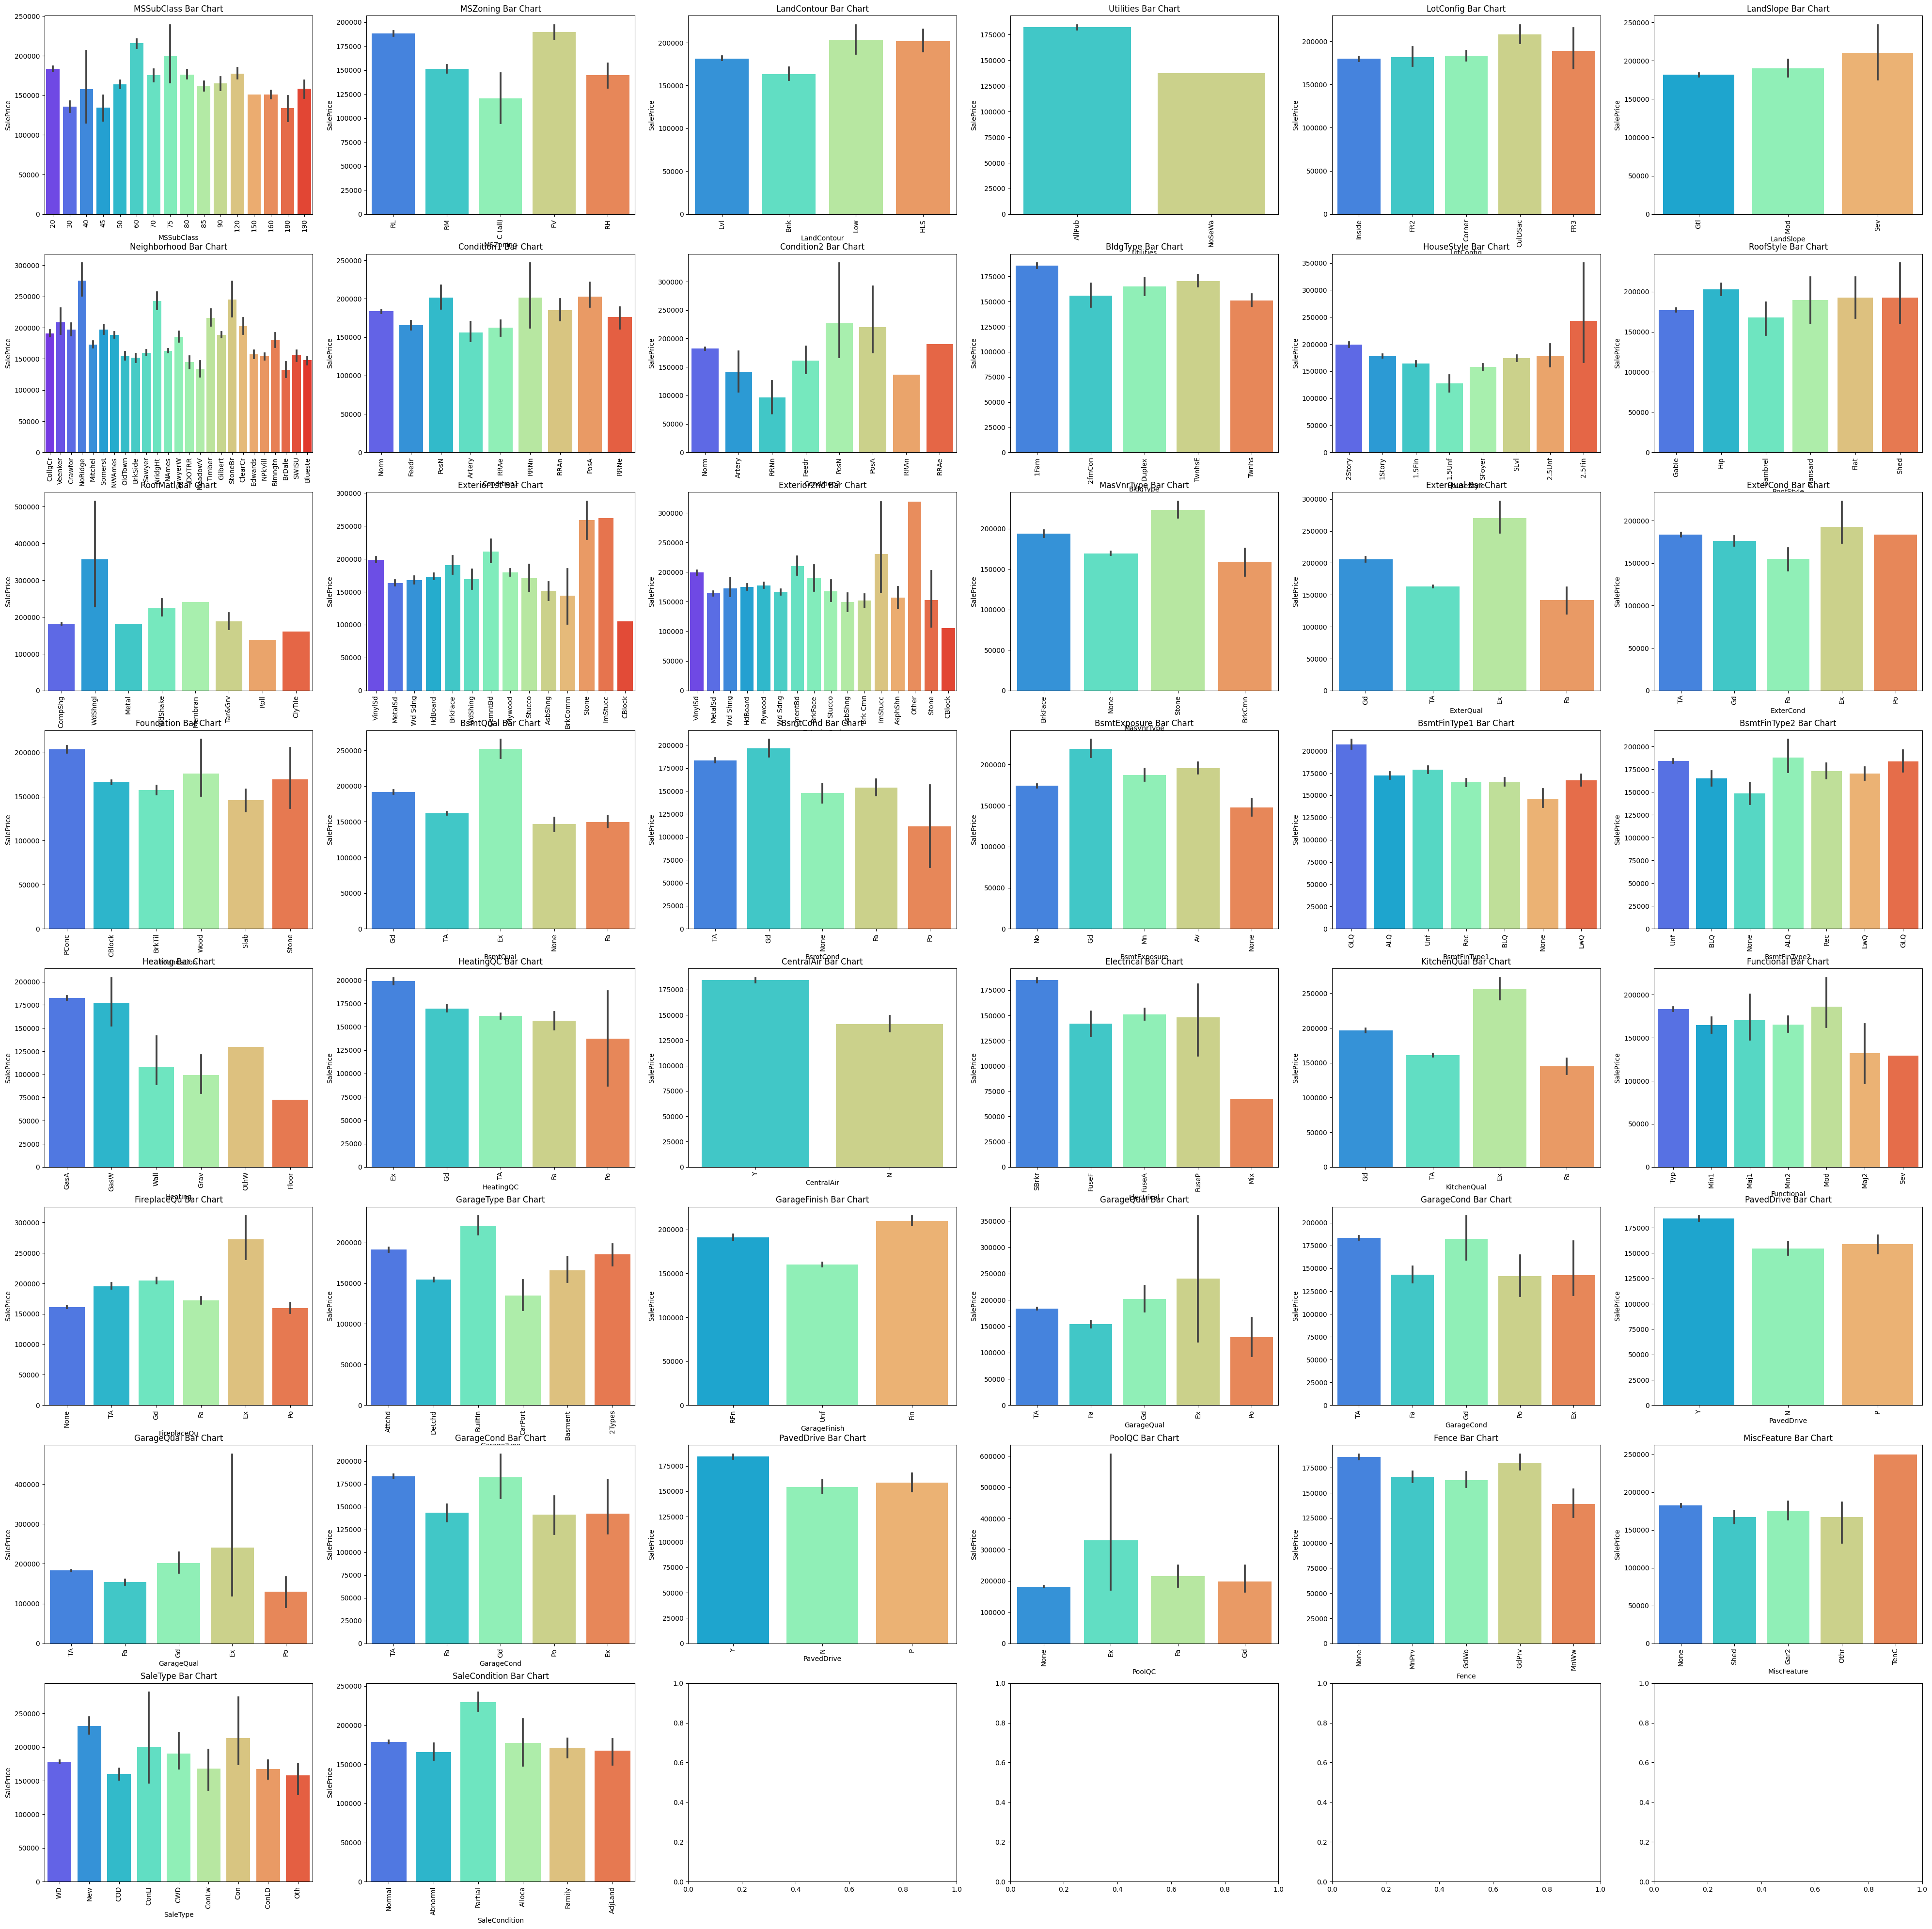

In [15]:
fig, ax = plt.subplots(8, 6, figsize=(50, 50))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.barplot(x = variable, y = "SalePrice", data=df_cleaned, palette='rainbow', ax=subplot).set(title=f"{variable} Bar Chart")
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.show()

In [16]:
# fig, ax = plt.subplots(15, 3, figsize=(30, 130))
# for variable, subplot in zip(categorical, ax.flatten()):
#     sns.countplot(x = variable, data=df_x, palette='rainbow', ax=subplot).set(title=f"{variable} Bar Chart")
#     for label in subplot.get_xticklabels():
#         label.set_rotation(90)
# plt.show()

### Numerical

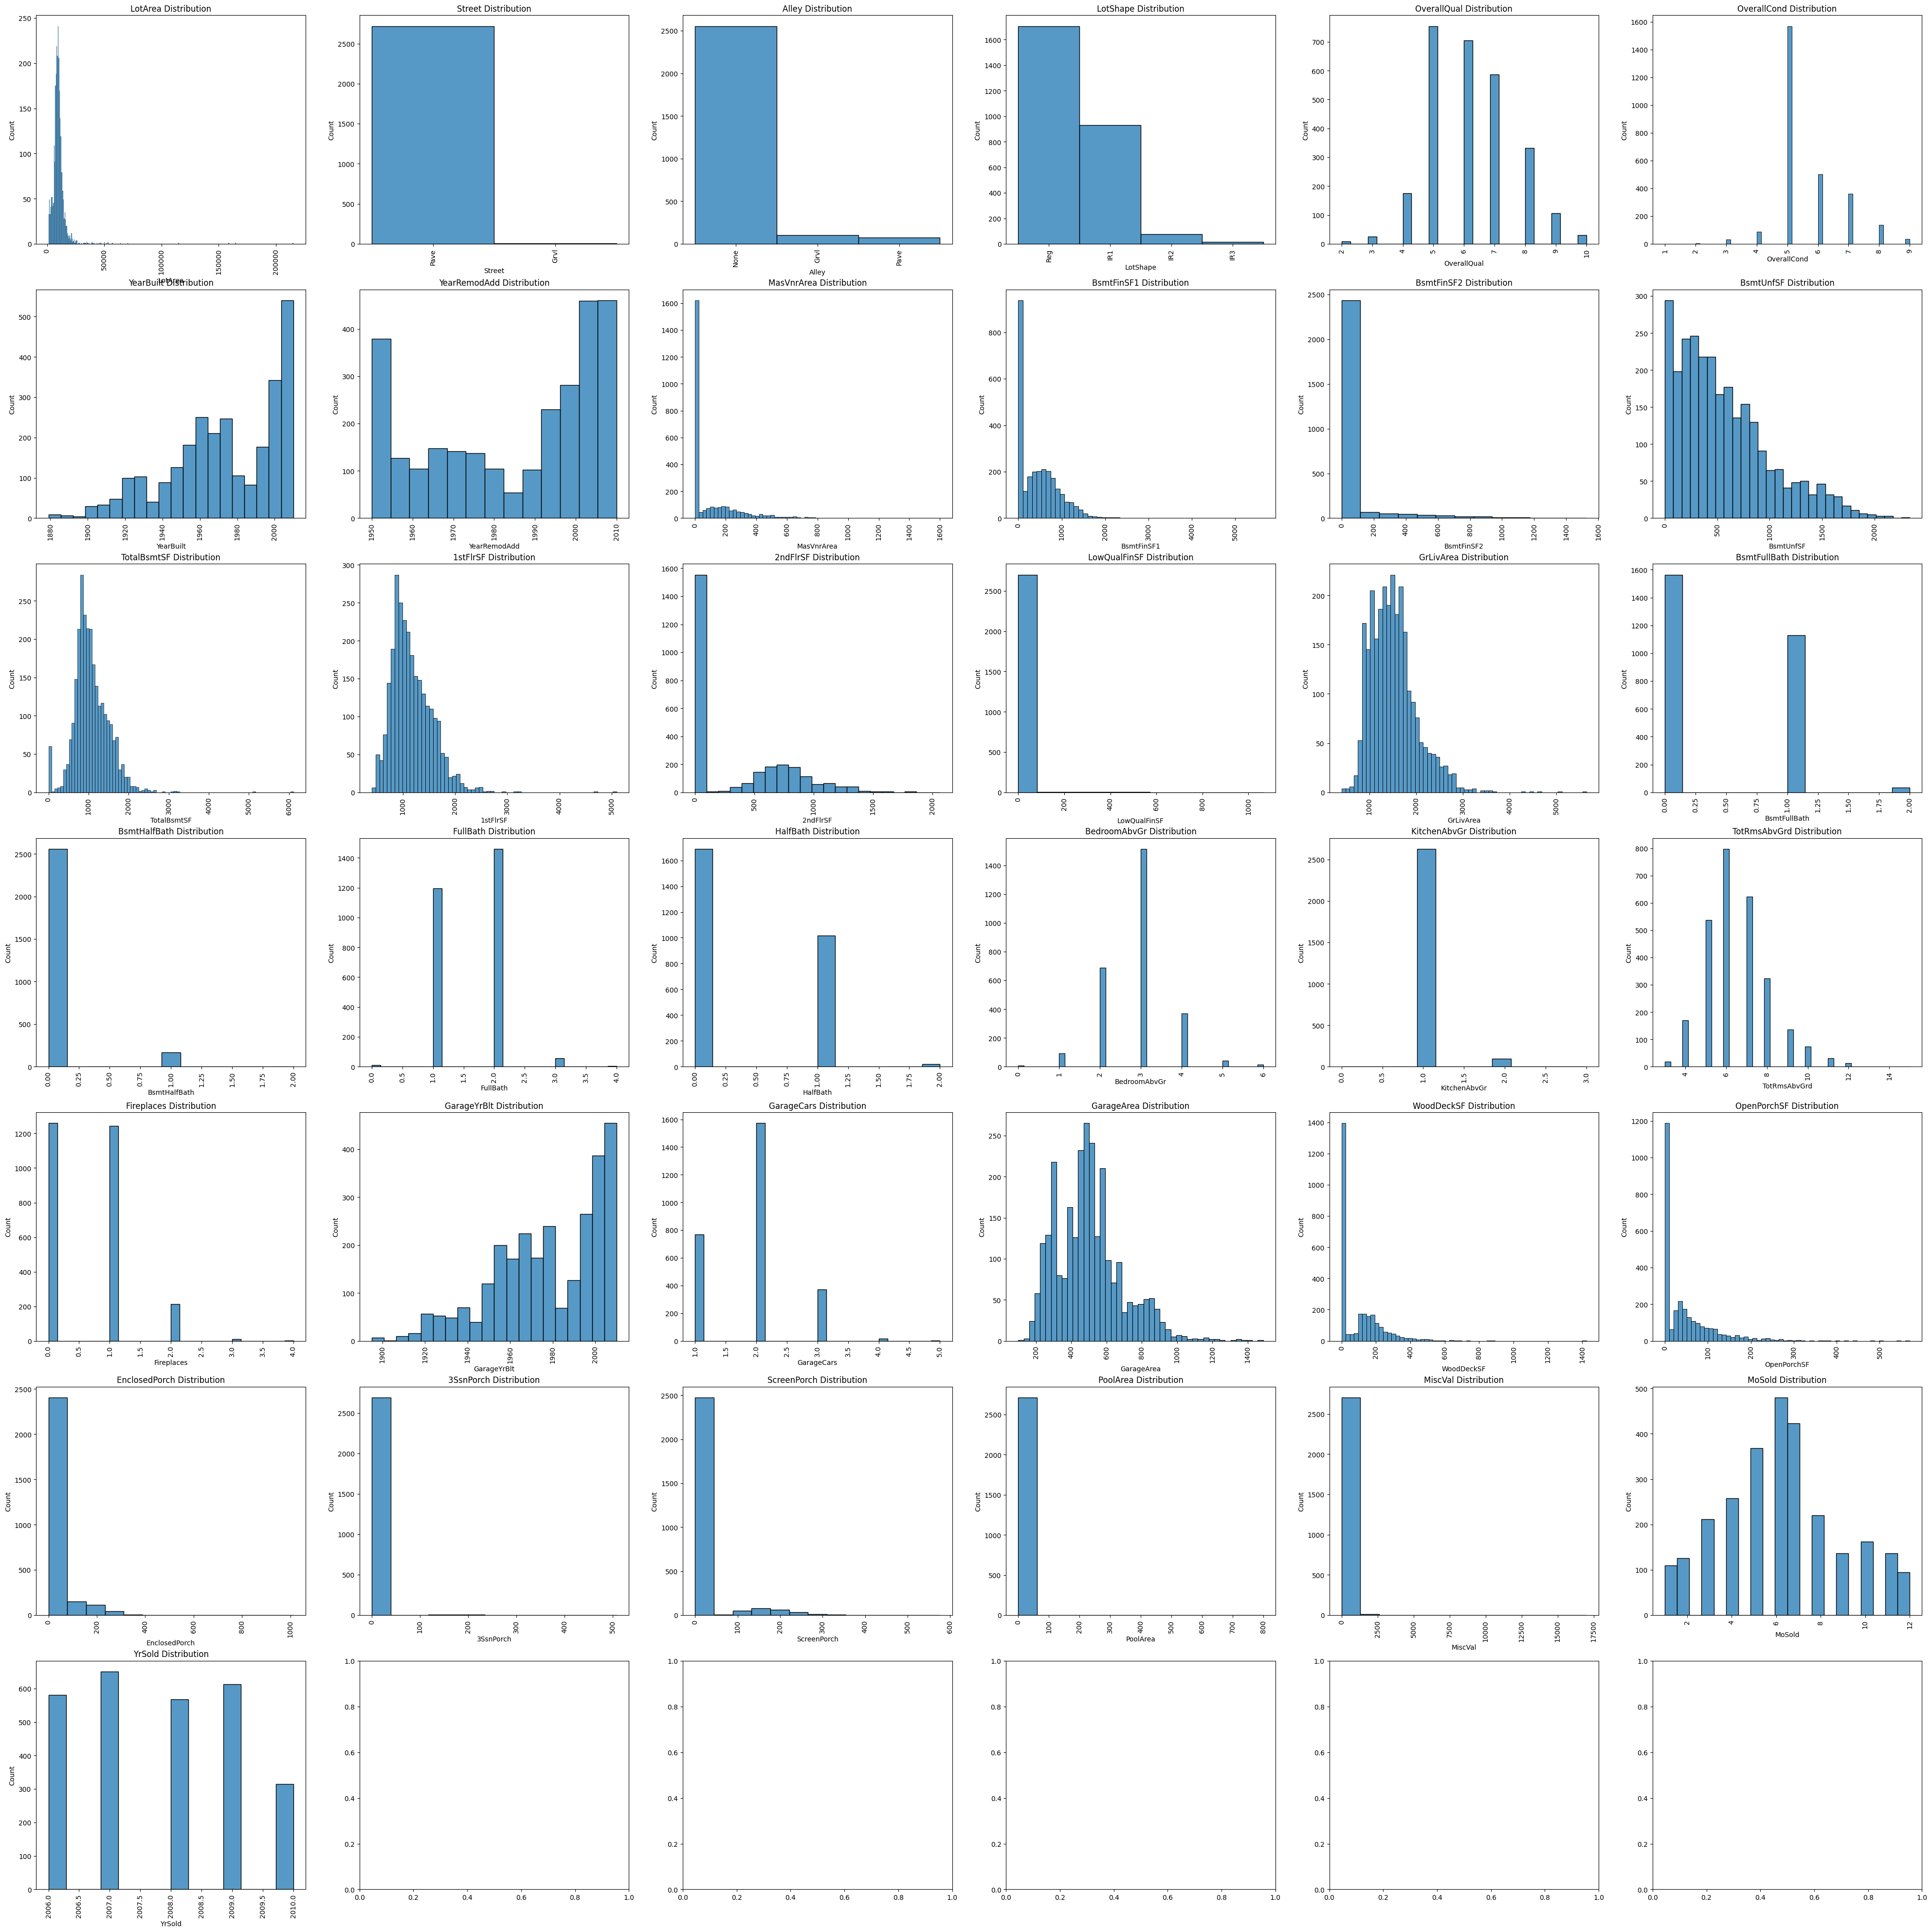

In [17]:
fig, ax = plt.subplots(7, 6, figsize=(50, 50))
for variable, subplot in zip(numerical, ax.flatten()):
    sns.histplot(x = variable, data=df_x, ax=subplot).set(title=f"{variable} Distribution")
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.show()

## Bivariate Analysis

In [18]:
# Plot relationships between the following features and the target variable price

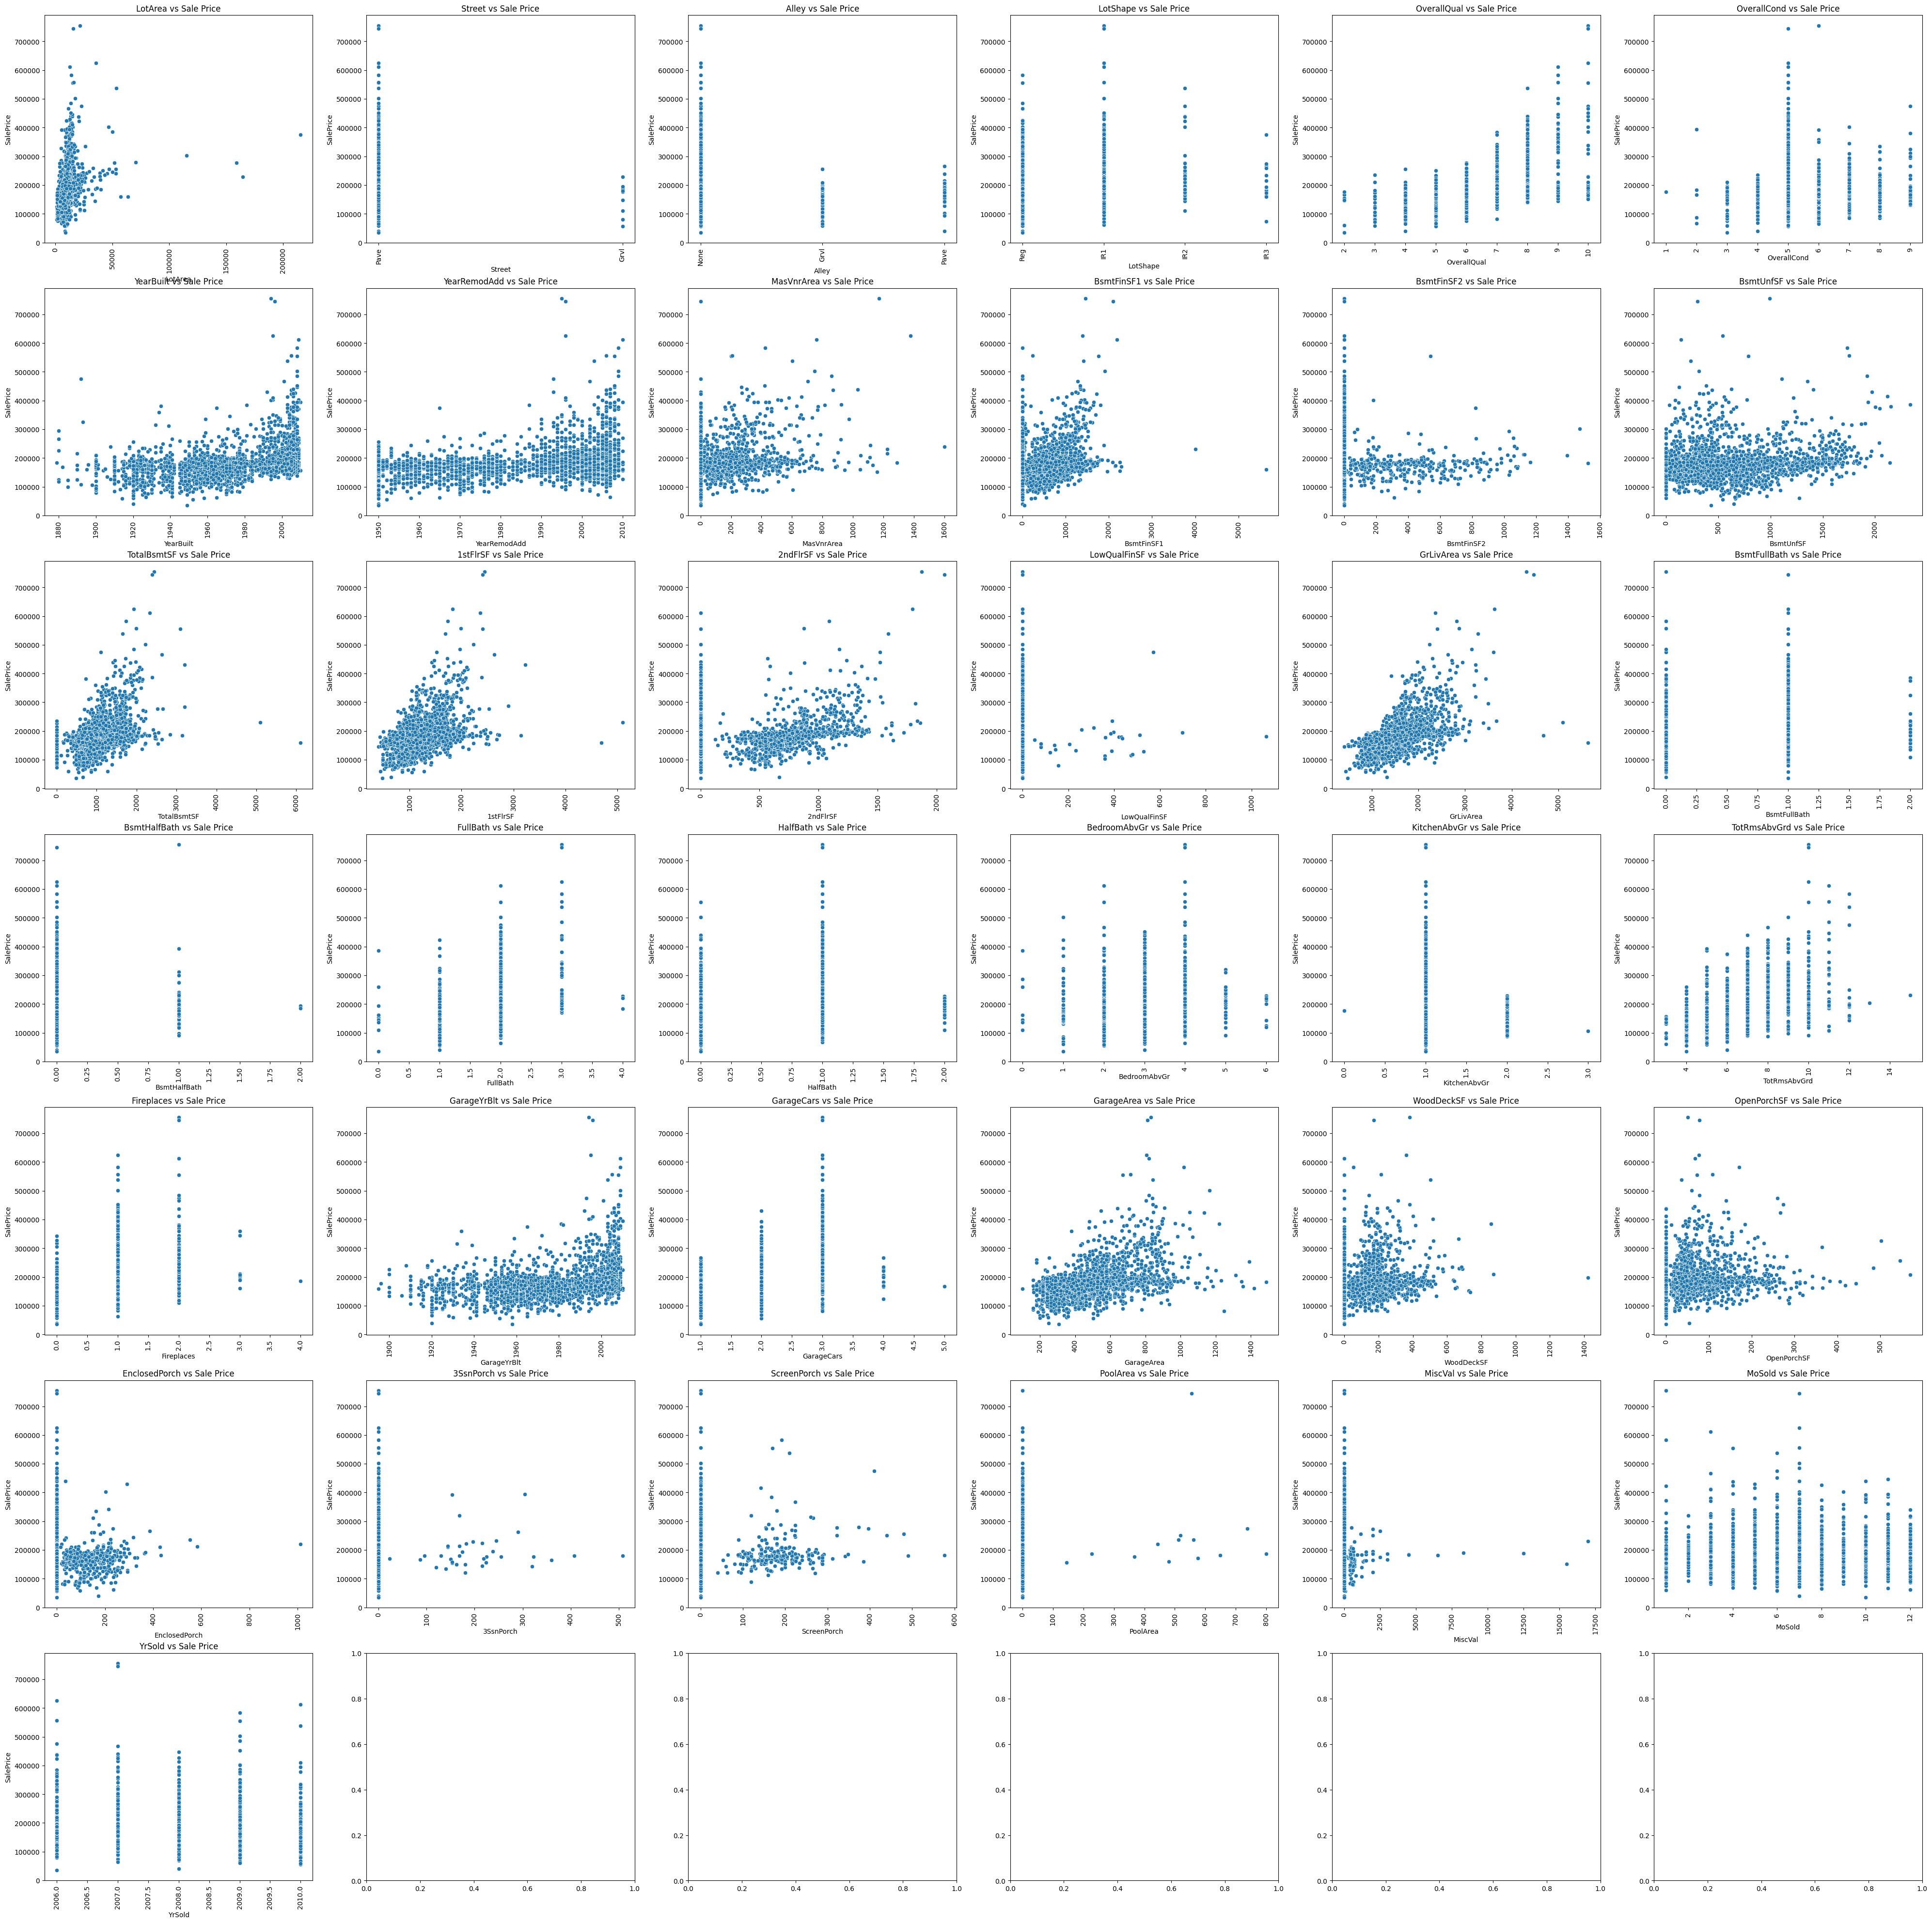

In [19]:
fig, ax = plt.subplots(7, 6, figsize=(50, 50))
for variable, subplot in zip(numerical, ax.flatten()):
    sns.scatterplot(x=variable, y="SalePrice", data=df_cleaned, ax=subplot).set(title=f"{variable} vs Sale Price")
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.show()